<a href="https://colab.research.google.com/github/RenatoBatista/ReconhecimentoDePadroes/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('../inputs/classification/smoke_detection_iot.csv')
#site: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [ ]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [ ]:
X_, y_ = data.drop('Fire Alarm',axis=1), data['Fire Alarm']
X_.shape, y_.shape

((62630, 15), (62630,))

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_,y_)
ypred = modelo.predict(X_)

In [ ]:
modelo.coef_

array([[-4.24774615e-15,  5.54691689e-10,  4.22108205e-20,
         2.42744236e-17, -3.13517578e-15, -1.92671898e-16,
         4.40491700e-15,  6.15420126e-15,  3.15436537e-16,
        -1.96471195e-16, -3.16947688e-16, -1.06876656e-15,
        -3.45795611e-16, -1.14277068e-16,  1.50784590e-14]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

print(mean_squared_error(y_, ypred))
print(accuracy_score(y_, ypred))

0.2853744212038959
0.7146255787961041


In [ ]:
modelo.intercept_

array([3.35261685e-19])

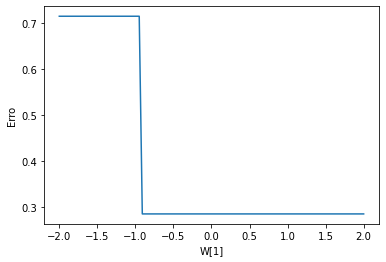

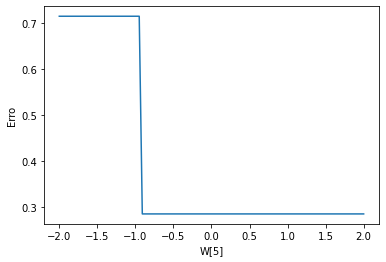

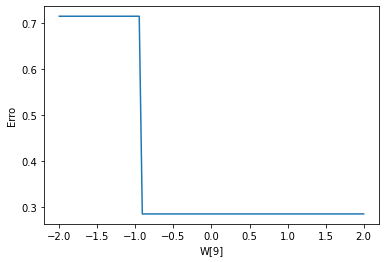

In [ ]:
from sklearn.linear_model import LogisticRegression
for k in range(1,12,4):
    modelo = LogisticRegression()
    modelo.fit(X_,y_)
    ypred = modelo.predict(X_)
    plot(k, 2)

import numpy as np

def plot(i, delta):
    erros = []
    coef = modelo.coef_[0][i]
    intercept = modelo.intercept_[0]
    ws = np.linspace(intercept-delta,intercept+delta,100)
    for w in ws:
        #print(w)
        modelo.intercept_ = w
        print(modelo.intercept_)
        ypred = modelo.predict(X_)
        erro = mean_squared_error(y_, ypred)
        erros.append(erro)
    modelo.coef_[0][i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws, erros)
    plt.show()

#plot(0, 5e10)

In [ ]:
#Variando o coef

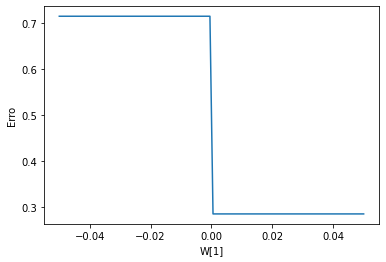

In [ ]:
import numpy as np
erros=0
ws=0
def plot(i, delta):
    erros = []
    coef = modelo.coef_[0][i]
    ws = np.linspace(coef-delta,coef+delta,100)
    for w in ws:
        modelo.coef_[0][i] = w
        ypred = modelo.predict(X_)
        erro = mean_squared_error(y_, ypred)
        erros.append(erro)
    modelo.coef_[0][i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws, erros)
    plt.show()

plot(10, 0.05)

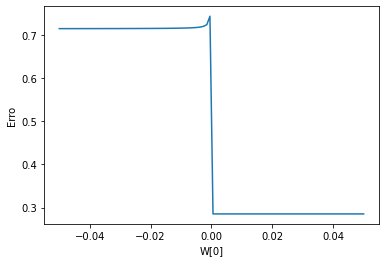

In [ ]:
import numpy as np
erros=0
ws=0
def plot(i, delta):
    erros = []
    coef = modelo.coef_[0][i]
    ws = np.linspace(coef-delta,coef+delta,100)
    for w in ws:
        modelo.coef_[0][i] = w
        ypred = modelo.predict(X_)
        erro = mean_squared_error(y_, ypred)
        erros.append(erro)
    modelo.coef_[0][i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws, erros)
    plt.show()

plot(0, 0.05)

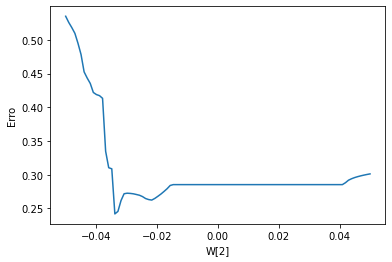

In [ ]:
import numpy as np
erros=0
ws=0
def plot(i, delta):
    erros = []
    coef = modelo.coef_[0][i]
    ws = np.linspace(coef-delta,coef+delta,100)
    for w in ws:
        modelo.coef_[0][i] = w
        ypred = modelo.predict(X_)
        erro = mean_squared_error(y_, ypred)
        erros.append(erro)
    modelo.coef_[0][i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws, erros)
    plt.show()

plot(2, 0.05)

In [ ]:
modelo.intercept_=1